<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT (EDA)
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [1]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:PZiQs7pqjInWTYn6D+h5pMA0glXYAQh2Kubu24a4c6Q root@1cc6552f88aa
The key's randomart image is:
+---[RSA 4096]----+
|oo.*o.           |
|o = .  .         |
|o+    +          |
|*o     + +       |
|+.. . o S o      |
|o.oo +     .     |
|+O*.+            |
|E=*+.o           |
|oX*+o.           |
+----[SHA256]-----+


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [2]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-10d0a39d


In [3]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCrGTb+1DobGDmmD19wRACeA65SA3CymkqRBwvabN04SzCXFx7B8/d/s+A3/VhZPxcjT/6LZ64nGQdu7WpEYVYkVEL4RDh51hDNNsjuLBLzOxHgrQiZaPJiCHbSJUCv1N9IMEdxRBatUTlSULO5uBtUJe/bBF3Mq5mKgQbg+XhrDGsUW0My8l26uLfJmEbK4qVSvX33nYbRm8W+aEnDNgg5uEibBXR0MVPkRDMEDfZDsxmIZAsp4H9EZe6wT5gFNAWJ7HoDw5KDlxNJKlmtLCumbfZXcnGHbNjd5+iPwBAezyFppGoxjXcamJEESWEotZwtBfykguPg8ptnPH9gfNxPQF7y74OsizDZwYT+BBk5UJ8APUeEPD2xHk+6bQ58dKObrRENrsujbk9w0XODbHBcnoHTjxNztxsdzND/6G1vDr/6TWZo8s3mY6/FAeWNlaH7dMyiH24MDXq6DVX08CvZnLV3xvhIP7u+9DzVw/Yw1bI0oxRNextmMKTrffLcIEMU6PnNB0xUsse13+SAf/TOJ87MaA0Zt6mmkGWBZeZB1dlXb7gIe+qpFOOYMwOXl/J1nrvekvxQiEBPYyjiMQyWNixDMBtxh7tVByluudqI0duSIMdJHZGhLyiyno7QdWGpn6GxN8xWxnatNr4OgWtrLTJI9z7myREx1jKhkroQOw== root@1cc6552f88aa


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [4]:
!ssh -T git@github.com

Hi ngzhankang! You've successfully authenticated, but GitHub does not provide shell access.


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [5]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 64 (delta 20), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (64/64), 311.07 KiB | 1.93 MiB/s, done.
Resolving deltas: 100% (20/20), done.


---
---

# 2.Data Importing

### 2.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [6]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 2.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [7]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# install necessary libraries that might not be found
!pip install -U spacy
!python -m spacy validate
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110,transformers,lookups]
!python -m spacy download en_core_web_trf

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

     |████████████████████████████████| 12.8MB 7.0MB/s 
     |████████████████████████████████| 460kB 56.8MB/s 
     |████████████████████████████████| 9.1MB 50.0MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 1.1MB 55.2MB/s 
     |████████████████████████████████| 122kB 57.8MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=964463b3686e726e6021ad22b681f6b7d9e299c5c07cbc0aa831e5be3ddb00b6
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: smart-open 5.0.0
    Uninstalling smart-open-5.0.0:
      Successfully uninstalled smart-open-

### 2.2. Load the modules

---

Load the necessary modules for usage in the entire project.

In [1]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

# configurate spacy settings
nlp = spacy.load("en_core_web_trf", disable=['parser', 'ner'])

# import stopwords
stopwords = nlp.Defaults.stop_words

%matplotlib inline

### 2.3. Load the dataset

---

Load the dataset for usage in the entire project.

In [2]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./Cleaned Dataset1.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,3335955665151329792,CUBIC DECO PTE. LTD.,SINGAPORE,NaN,cni,cni_service providers,cni_service providers,midstream,https://www.cubicdeco.com/,Cubic Deco Pte Ltd is an interior contractor b...,NaN
1,4869155818043957248,UTRACON CORPORATION PTE. LTD.,SINGAPORE,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,https://utracon.com/ucplwp/index.php/about-us/,The Company provides civil engineering service...,NaN
2,9105432065968196608,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,NaN,cni,building material,building material_manufacturer,midstream,https://www.overlandceramics.com/,Overland Ceramics is a ceramic tile manufactur...,NaN
3,1443389736722230016,BYMA PTE LTD,SINGAPORE,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,https://recordowl.com/company/byma-pte-ltd,BYMA is a joint-venture between Bouygues Batim...,NaN
4,8604660251488355328,TTCL MALAYSIA SDN. BHD.,MALAYSIA,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,https://www.ttcl.com/about/subsidiary_and_affi...,TTCL has experiences and expertises in providi...,NaN
5,4532858488890287104,LYRA INFORMATION PTE. LTD.,SINGAPORE,NaN,tmt,it services,it services,midstream,https://recordowl.com/company/lyra-infosystems...,Lyra Infosystems is a Technology Services & IT...,NaN
6,1265923277439065088,XINYUAN CONSTRUCTION PTE. LTD.,SINGAPORE,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,https://sgpgrid.com/company-details/xinyuan-co...,We are a rapidly growing development & constru...,NaN
7,8916117183994534912,HARUM MAJUINDAH SDN. BHD.,MALAYSIA,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,https://www.ctoscredit.com.my/business/HARUM-M...,"TRADING OF BUILDING MATERIALS, SPECIALISES IN ...",NaN
8,3859622006099505152,SINGAPORE RADIO & INDUSTRY PTE LTD,SINGAPORE,NaN,tmt,consumer electronics,consumer electronics_distributor,downstream,https://www.timesbusinessdirectory.com/compani...,Importers and exporters of gas cookers and de...,NaN
9,3949003258736629248,MEC JATI CONSORTIUM SDN. BHD.,MALAYSIA,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,http://mecjati.com/about-us/,MEC JATI CONSORTIUM SDN. BHD.( 479906-A) is a ...,NaN


---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [3]:
# see the row headers of the entire pandas dataframe first
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [4]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = companies['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = companies['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = companies['Valuechain'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)

Total number of records: 376
Total number of countries: 7
Total number of sectors: 7
Total number of subsectors: 20
Total number of valuechain: 8


In [5]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE    134
THAILAND      93
MALAYSIA      93
CHINA         21
INDONESIA     18
HONG KONG     16
AUSTRALIA      1
Name: Country, dtype: int64

List of unique sector:
cni    168
tmt    146
ong     49
ind      6
cg       5
reh      1
CNI      1
Name: Sector, dtype: int64

List of unique valuechain:
midstream                 218
downstream                118
upstream                   26
upstream or downstream      7
manufacturer                3
across value chain          2
trader                      1
DOWNSTREAM                  1
Name: Valuechain, dtype: int64


In [6]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
buildings & industrial               93
building material                    54
consumer electronics                 51
it services                          35
o&g                                  35
semiconductor                        24
digital_business                     14
telecommunication                    14
petrochemical                        12
cni_service providers                10
media                                 8
utilities                             8
retail n distribution                 4
metals and mining                     4
infrastructure                        3
auto & mec                            2
o&g_service providers/contractors     2
commercial                            1
cni_equipment suppliers               1
agribusiness                          1
Name: Subsector, dtype: int64


In [7]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
buildings & industrial_contractor                              93
consumer electronics_distributor                               48
building material_manufacturer                                 37
it services                                                    35
o&g_retail outlet                                              31
building material_supplier_distributor                         17
electronics components/semiconductor_component manufacturer    17
digital_business                                               14
cni_service providers                                          10
network operator                                                9
petrochemical_producer                                          7
electronics components/semiconductor_component distributor      7
o&g_distributor                                                 4
utilities_developer                                             4
media_aggregator/distributor                      

### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [8]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,CUBIC DECO PTE. LTD.,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,Cubic Deco Pte Ltd is an interior contractor b...
1,UTRACON CORPORATION PTE. LTD.,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,The Company provides civil engineering service...
2,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,cni,building material,building material_manufacturer,midstream,Overland Ceramics is a ceramic tile manufactur...
3,BYMA PTE LTD,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,BYMA is a joint-venture between Bouygues Batim...
4,TTCL MALAYSIA SDN. BHD.,MALAYSIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,TTCL has experiences and expertises in providi...
...,...,...,...,...,...,...,...
371,TRANSWATER API SDN. BHD.,MALAYSIA,ong,o&g_service providers/contractors,o&g midstream and downstream service provider,downstream,TRANSWATER is staffed with a group of dedicate...
372,"FOMOTHAI CORPORATION CO.,LTD.",THAILAND,ong,petrochemical,petrochemical_producer,upstream or downstream,Manufacture of pesticides and other chemicals ...
373,"ZHEJIANG SOWOW E-COMMERCE CO., LTD.",CHINA,tmt,digital_business,digital_business,midstream,SOWOW is an e-commerce operation service provi...
374,"XINHUA NEWS AGENCY PRINTING CO., LTD.",CHINA,tmt,media,media_aggregator/distributor,midstream,Xinhua News Agency or New China News Agency is...


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [9]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information


In [10]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,CUBIC DECO PTE. LTD.,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,Cubic Deco Pte Ltd is an interior contractor b...
1,UTRACON CORPORATION PTE. LTD.,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,The Company provides civil engineering service...
2,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,cni,building material,building material_manufacturer,midstream,Overland Ceramics is a ceramic tile manufactur...
3,BYMA PTE LTD,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,BYMA is a joint-venture between Bouygues Batim...
4,TTCL MALAYSIA SDN. BHD.,MALAYSIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,TTCL has experiences and expertises in providi...
...,...,...,...,...,...,...,...
371,TRANSWATER API SDN. BHD.,MALAYSIA,ong,o&g_service providers/contractors,o&g midstream and downstream service provider,downstream,TRANSWATER is staffed with a group of dedicate...
372,"FOMOTHAI CORPORATION CO.,LTD.",THAILAND,ong,petrochemical,petrochemical_producer,upstream or downstream,Manufacture of pesticides and other chemicals ...
373,"ZHEJIANG SOWOW E-COMMERCE CO., LTD.",CHINA,tmt,digital_business,digital_business,midstream,SOWOW is an e-commerce operation service provi...
374,"XINHUA NEWS AGENCY PRINTING CO., LTD.",CHINA,tmt,media,media_aggregator/distributor,midstream,Xinhua News Agency or New China News Agency is...


In [11]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 376


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

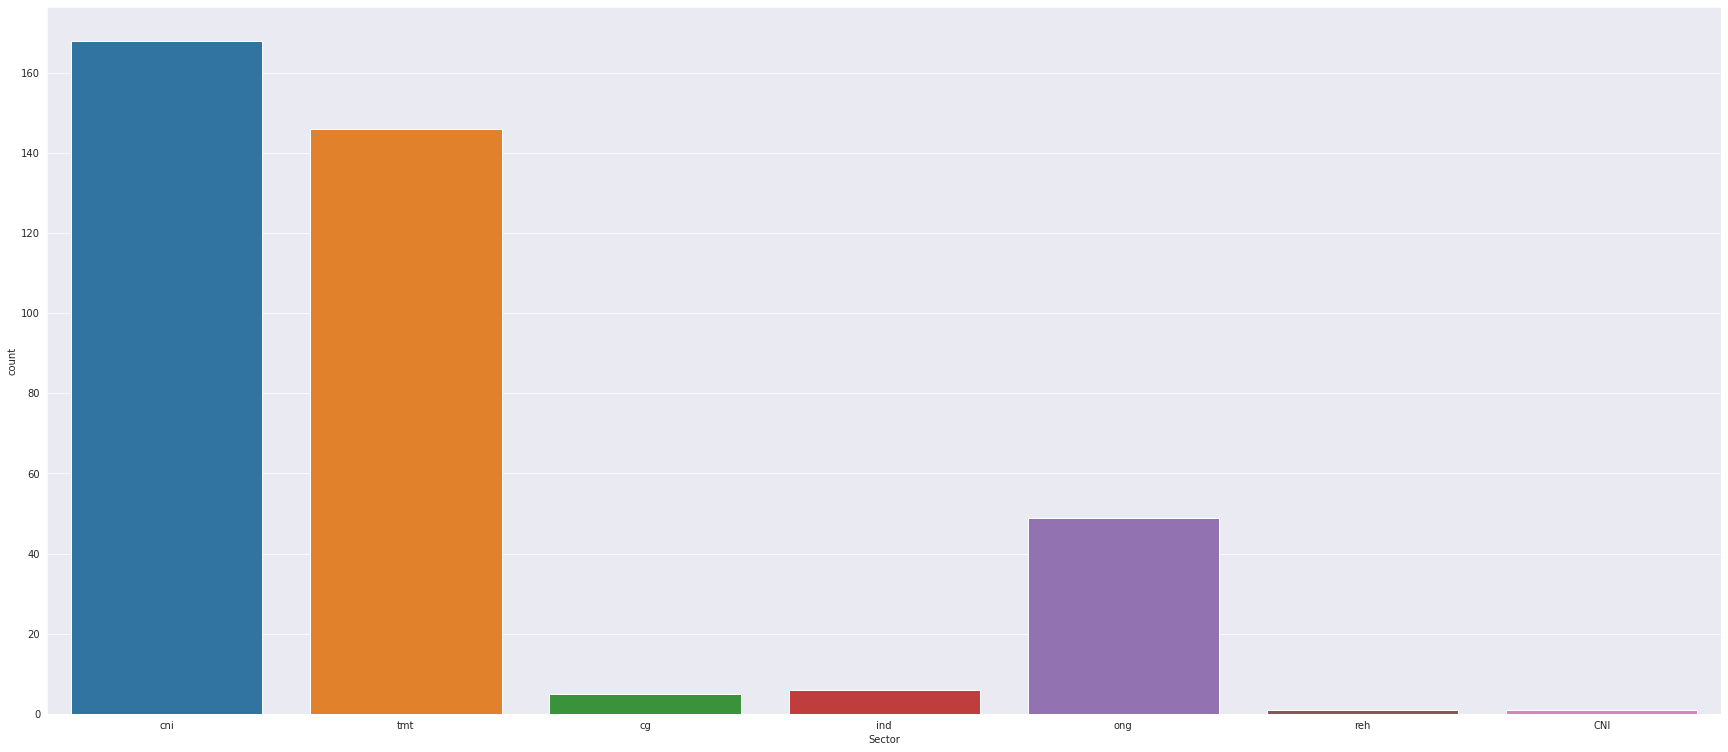

In [12]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

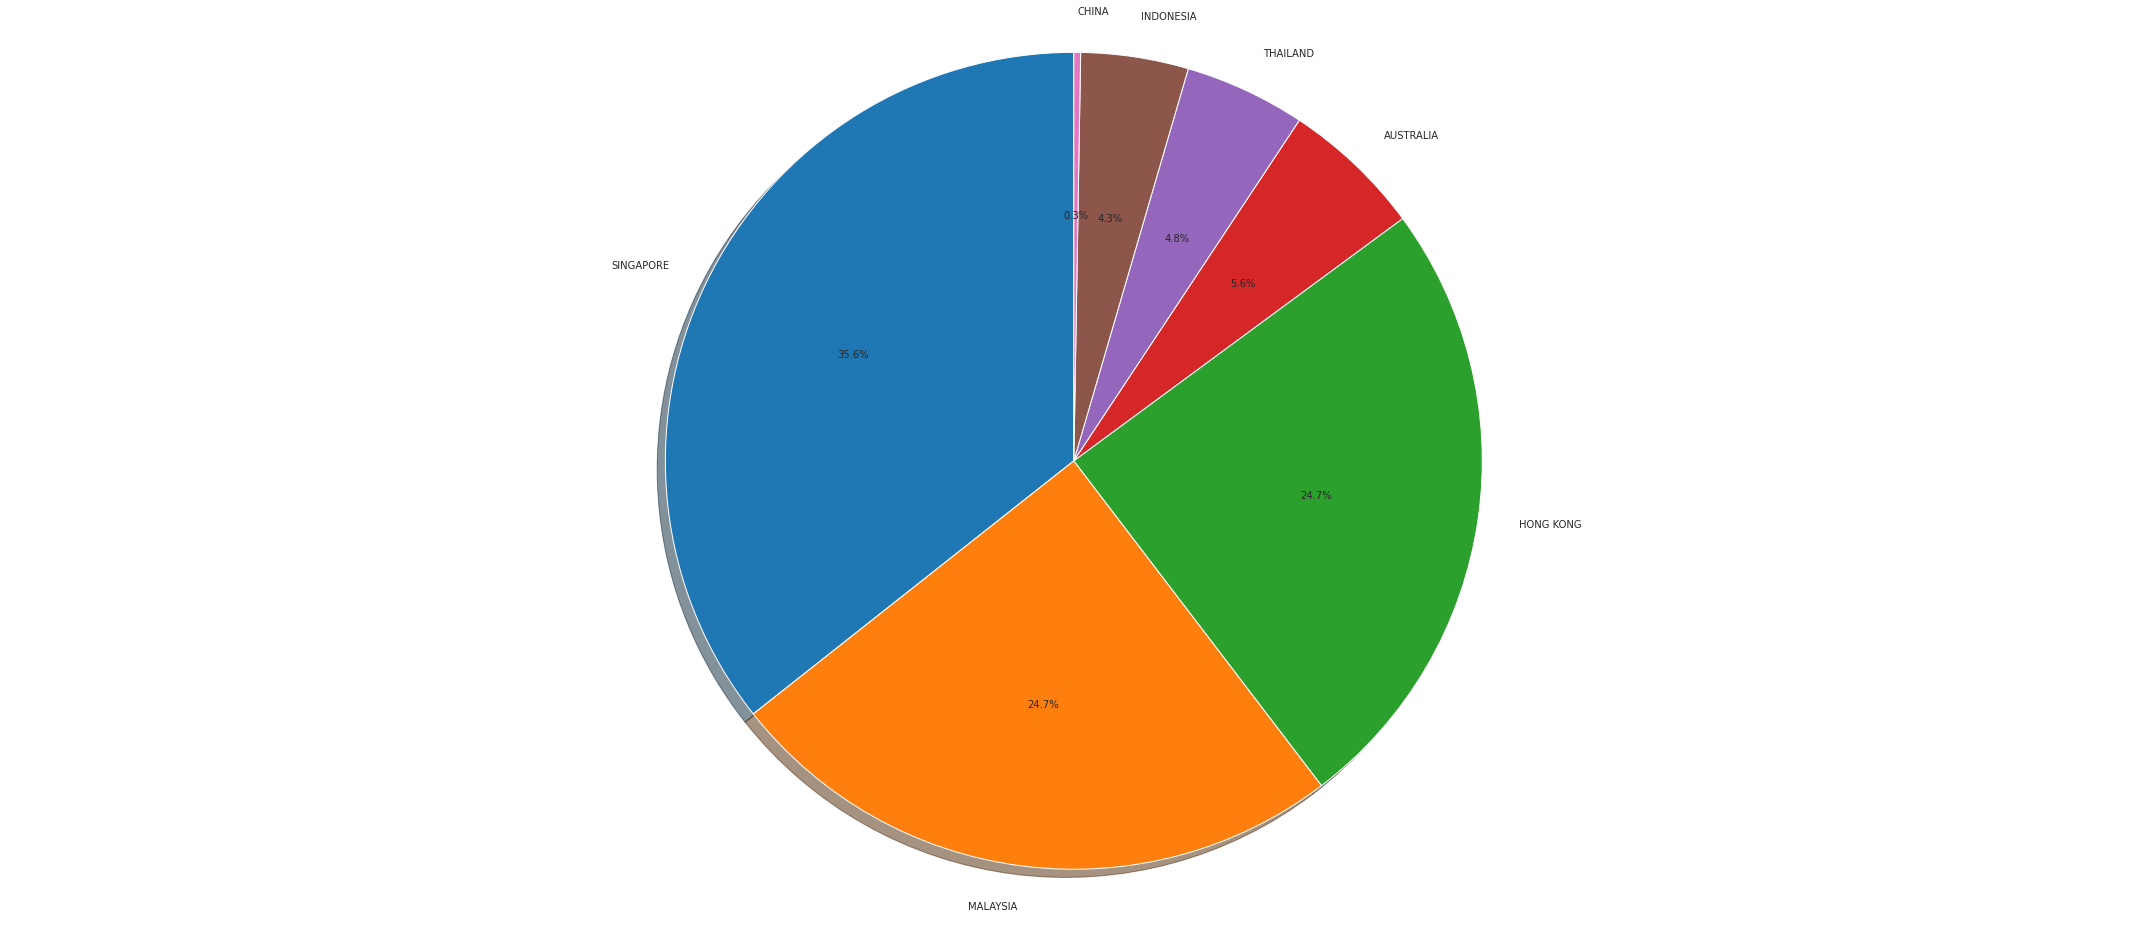

In [13]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [14]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Cubic Deco Pte Ltd is an interior contractor based in Singapore. Incorporated in March 2005 and with a current strength of 30, we provide professional services for interior fit out and construction works for residential, offices and retail spaces. We also offer a complete custom-made carpentry and joinery works right here at our inhouse workshop. 
1                                    

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [15]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

# now we validate to see if theye are really gone
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Cubic Deco Pte Ltd is an interior contractor based in Singapore. Incorporated in March 2005 and with a current strength of 30, we provide professional services for interior fit out and construction works for residential, offices and retail spaces. We also offer a complete custom-made carpentry and joinery works right here at our inhouse workshop. 
1                                    

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [16]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,CUBIC DECO PTE. LTD.,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,"Cubic Deco Pte Ltd is an interior contractor based in Singapore. Incorporated in March 2005 and with a current strength of 30, we provide professional services for interior fit out and construction works for residential, offices and retail spaces. We also offer a complete custom-made carpentry and joinery works right here at our inhouse workshop.",349.0
1,UTRACON CORPORATION PTE. LTD.,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,The Company provides civil engineering services and on-site post-tensioning products.,85.0
2,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,cni,building material,building material_manufacturer,midstream,"Overland Ceramics is a ceramic tile manufacturer & supplier integrating design, research and development, manufacturing and marketing. Our products are wholesale marble tile & stone tile.",187.0
3,BYMA PTE LTD,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,"BYMA is a joint-venture between Bouygues Batiment International and SPA Project Management. The company brings together the expertise of a leading international construction group (Bouygues Construction) and the local knowledge of Yoma Strategic Holdings focusing on the Myanmar market. In April 2013, BYMA was awarded by Thanlin Estate Development the design and build contract for the 2nd phase of Star City (Zone B), a prominent residential estate featuring 4,980 apartments, car parks and communal facilities located along the Bago River in the outskirts of Yangon. In December 2014, BYMA was also awarded the 3rd phase of Star City (Zone C). The development will be composed of 6 residential towers, including 956 residential units, as well as a 26,000m2 car park, located around the periphery of the site over two levels, providing 1,147 car park spaces. With more than 1,500 employees, BYMA will soon be the leading construction company in Myanmar.",956.0
4,TTCL MALAYSIA SDN. BHD.,MALAYSIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,"TTCL has experiences and expertises in providing integrated design and engineering, procurement of machinery & equipment, and construction (Integrated EPC) of turnkey projects for industrial and process plants, mainly in energy, petrochemical, chemical and power industries.",274.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


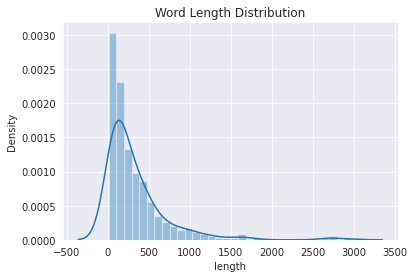

In [17]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>

### 4.3. Subsample from the entire dataset

---

We will now subsample a part of the dataset from the entire dataset. This is important as firstly, we need to ensure that our tokenization is working correctly in a smaller scale dataset, since using the entire dataset to do it will be very time consuming.

In [18]:
# declare sample size here first (CHANGE IT AS THE TRAINING DATA INCREASES)
sample_size = 350

# now we will get the data from the restricted range of sample size
subsample = df_valid[:sample_size]
subsample

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,CUBIC DECO PTE. LTD.,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,"Cubic Deco Pte Ltd is an interior contractor based in Singapore. Incorporated in March 2005 and with a current strength of 30, we provide professional services for interior fit out and construction works for residential, offices and retail spaces. We also offer a complete custom-made carpentry and joinery works right here at our inhouse workshop.",349.0
1,UTRACON CORPORATION PTE. LTD.,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,The Company provides civil engineering services and on-site post-tensioning products.,85.0
2,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,cni,building material,building material_manufacturer,midstream,"Overland Ceramics is a ceramic tile manufacturer & supplier integrating design, research and development, manufacturing and marketing. Our products are wholesale marble tile & stone tile.",187.0
3,BYMA PTE LTD,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,"BYMA is a joint-venture between Bouygues Batiment International and SPA Project Management. The company brings together the expertise of a leading international construction group (Bouygues Construction) and the local knowledge of Yoma Strategic Holdings focusing on the Myanmar market. In April 2013, BYMA was awarded by Thanlin Estate Development the design and build contract for the 2nd phase of Star City (Zone B), a prominent residential estate featuring 4,980 apartments, car parks and communal facilities located along the Bago River in the outskirts of Yangon. In December 2014, BYMA was also awarded the 3rd phase of Star City (Zone C). The development will be composed of 6 residential towers, including 956 residential units, as well as a 26,000m2 car park, located around the periphery of the site over two levels, providing 1,147 car park spaces. With more than 1,500 employees, BYMA will soon be the leading construction company in Myanmar.",956.0
4,TTCL MALAYSIA SDN. BHD.,MALAYSIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,"TTCL has experiences and expertises in providing integrated design and engineering, procurement of machinery & equipment, and construction (Integrated EPC) of turnkey projects for industrial and process plants, mainly in energy, petrochemical, chemical and power industries.",274.0
...,...,...,...,...,...,...,...,...
345,"CPACE INTER CO.,LTD.",THAILAND,ong,petrochemical,petrochemical_producer,upstream or downstream,Business Category: Manufacture of pesticides and other chemicals for agriculture,80.0
346,"HANGZHOU XIANGFU FUEL STATION CO.,LTD",CHINA,ong,o&g,o&g_retail outlet,downstream,"Hangzhou Xiangfu Fuel Station Co., Ltd. was founded in 1989. The company's line of business includes selling gasoline and lubricating oils.",139.0
347,"ANQILI ELECTRONIC COMPONENTS (SHENZHEN) CO., LTD ()",CHINA,tmt,semiconductor,electronics components/semiconductor_component manufacturer,upstream,"Anqili Electronics Components (Shenzhen) Co., Ltd. was founded in 1991. The Company's line of business includes the manufacturing of electronic components such as antennas, switches, and waveguides.",198.0
348,"HENAN ZHONGYUAN HEAVY FORGING CO., LTD",CHINA,ind,metals and mining,steel fabricator,manufacturer,"Henan Zhongyuan Heavy Forging Co., Ltd. was founded in 2004. The company's line of business includes the operation of blast furnaces and steel mills.",149.0


### 4.4. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [19]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,CUBIC DECO PTE. LTD.,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,"Cubic Deco Pte Ltd is an interior contractor based in Singapore. Incorporated in March 2005 and with a current strength of 30, we provide professional services for interior fit out and construction works for residential, offices and retail spaces. We also offer a complete custom-made carpentry and joinery works right here at our inhouse workshop.",349
1,UTRACON CORPORATION PTE. LTD.,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,The Company provides civil engineering services and on-site post-tensioning products.,85
2,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,cni,building material,building material_manufacturer,midstream,"Overland Ceramics is a ceramic tile manufacturer & supplier integrating design, research and development, manufacturing and marketing. Our products are wholesale marble tile & stone tile.",187
3,BYMA PTE LTD,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,"BYMA is a joint-venture between Bouygues Batiment International and SPA Project Management. The company brings together the expertise of a leading international construction group (Bouygues Construction) and the local knowledge of Yoma Strategic Holdings focusing on the Myanmar market. In April 2013, BYMA was awarded by Thanlin Estate Development the design and build contract for the 2nd phase of Star City (Zone B), a prominent residential estate featuring 4,980 apartments, car parks and communal facilities located along the Bago River in the outskirts of Yangon. In December 2014, BYMA was also awarded the 3rd phase of Star City (Zone C). The development will be composed of 6 residential towers, including 956 residential units, as well as a 26,000m2 car park, located around the periphery of the site over two levels, providing 1,147 car park spaces. With more than 1,500 employees, BYMA will soon be the leading construction company in Myanmar.",956
4,TTCL MALAYSIA SDN. BHD.,MALAYSIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,"TTCL has experiences and expertises in providing integrated design and engineering, procurement of machinery & equipment, and construction (Integrated EPC) of turnkey projects for industrial and process plants, mainly in energy, petrochemical, chemical and power industries.",274
...,...,...,...,...,...,...,...,...
371,TRANSWATER API SDN. BHD.,MALAYSIA,ong,o&g_service providers/contractors,o&g midstream and downstream service provider,downstream,"TRANSWATER is staffed with a group of dedicated employees who are experienced and suitably qualified in the field of work they work in. More than half our staff and managers are technically trained and qualified engineers with relevant industry experiences. For over 30 years as the local business partner for Emerson Process Management, our engineers have acquired not only product knowledge but also industry focused application knowledge for Fisher Controls, Regulator Technologies, Control systems and solutions. We provide business solutions to our customers through the correct application of products, services and solutions that contribute to our customer’s enterprise in the areas of control, safety, efficiency, and reliability. Our local team is able to support customer’s project planning activities from grass root project engineering stage, whether the requirement involves a single piece of equipment, a complete engineered control system, local training or engineering services for the technology they have already owned. We strive to develop a long-term relationship with each customers by taking ownership and working together up to the implemented stage.",1174
372,"FOMOTHAI CORPORATION CO.,LTD.",THAILAND,ong,petrochemical,petrochemical_producer,upstream or downstream,Manufacture of pesticides and other chemicals for 

### 4.5. Text Tokenization, Removing Stop Words, punctuations, numbers, stop words and Lower Case

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous. In this process, we will also process with stop words, punctuations, numeric figures, lower cap words and lemmatize words all using the spaCy API.

In [20]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
  df_valid[i] = df_valid[i].astype(str)

In [32]:
# removes punctuation, stop words and numeric figures from the string and lowercap words
df_valid['lemmatized'] = df_valid['Company Profile Information'].apply(lambda x: [w.lemma_ and w.lower_ for w in nlp(x) if (not w.is_punct and not w.like_num and not w.is_stop and not w.is_digit)])

In [29]:
df_valid[['lemmatized']]

,lemmatized
0,"[cubic, deco, pte, ltd, interior, contractor, based, singapore, incorporated, march, current, strength, provide, professional, services, interior, fit, construction, works, residential, offices, retail, spaces, offer, complete, custom, carpentry, joinery, works, right, inhouse, workshop]"
1,"[company, provides, civil, engineering, services, site, post, tensioning, products]"
2,"[overland, ceramics, ceramic, tile, manufacturer, supplier, integrating, design, research, development, manufacturing, marketing, products, wholesale, marble, tile, stone, tile]"
3,"[byma, joint, venture, bouygues, batiment, international, spa, project, management, company, brings, expertise, leading, international, construction, group, bouygues, construction, local, knowledge, yoma, strategic, holdings, focusing, myanmar, market, april, byma, awarded, thanlin, estate, development, design, build, contract, 2nd, phase, star, city, zone, b, prominent, residential, estate, featuring, apartments, car, parks, communal, facilities, located, bago, river, outskirts, yangon, december, byma, awarded, 3rd, phase, star, city, zone, c, development, composed, residential, towers, including, residential, units, 26,000m2, car, park, located, periphery, site, levels, providing, car, park, spaces, employees, byma, soon, leading, construction, company, myanmar]"
4,"[ttcl, experiences, expertises, providing, integrated, design, engineering, procurement, machinery, equipment, construction, integrated, epc, turnkey, projects, industrial, process, plants, mainly, energy, petrochemical, chemical, power, industries]"
...,...
371,"[transwater, staffed, group, dedicated, employees, experienced, suitably, qualified, field, work, work, half, staff, managers, technically, trained, qualified, engineers, relevant, industry, experiences, years, local, business, partner, emerson, process, management, engineers, acquired, product, knowledge, industry, focused, application, knowledge, fisher, controls, regulator, technologies, control, systems, solutions, provide, business, solutions, customers, correct, application, products, services, solutions, contribute, customer, enterprise, areas, control, safety, efficiency, reliability, , local, team, able, support, customer, project, planning, activities, grass, root, project, engineering, stage, requirement, involves, single, piece, equipment, complete, engineered, control, system, local, training, engineering, services, technology, owned, strive, develop, long, term, relationship, customers, taking, ownership, working, implemented, stage]"
372,"[manufacture, pesticides, chemicals, agriculture]"
373,"[sowow, e, commerce, operation, service, provider, international, brands, including, strategic, partnerships, nike, p&g, loreal, unilever, , korea, sowow, newest, market, work, blueair, providing, level, service, solutions, , sowow, provides, international, brands, expertise, needed, enter, china, market, 360o, model, support, allows, large, international, brands, sell, multiple, platforms, including, t, mall, jd, , south, east, asia, support, customers, lazada, sell, malaysia, singapore, indonesia, philippines, thailand, vietnam, , sowow, able, assume, strategy, branding, digital, marketing, e, commerce, content, creation, e, commerce, channel, management, data, mining, crm, customer, relationship, management, roles, stop, shop, operation]"
374,"[xinhua, news, agency, new, china, news, agency, official, state, run, press, agency, people, republic, china, xinhua, biggest, influential, media, organization, china, largest, news, agency, world, terms, correspondents, worldwide]"


<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> From this tokenization, we can see that the spaCy library has already helped tokenize corresponding punctuations also, thus we do not need to do the further steps.
</div>

### 4.6. Extracting random 100 from the 300 subsample to see quality of tokenization and lemmenization.

---

We will now extract some of the dataset from the 300 subsample dataset to examine the quality of the lemmenization process.

---
---

# 5.Further Data Preprocessing

---
---

# 10.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)

